In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Dropout, Lambda, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.python.keras.utils.vis_utils import plot_model


# Prepare data


In [2]:
xs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)
ys = 2*xs - 1


## Custom loss

In [3]:
def huber_loss_with_threshold(threshold = 1):
    def huber_loss(y_true, y_pred):
        error = y_true - y_pred
        is_error = tf.abs(error) <= threshold
        return tf.where(is_error, .5 * tf.square(error), threshold * (tf.abs(error - .5  * threshold)))
    return huber_loss

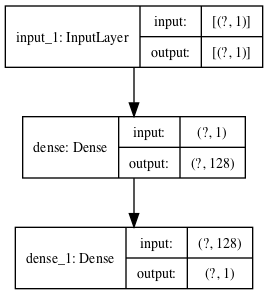

In [4]:
## Model
def model():
    input_x = Input(shape=[1])
    x = Dense(128, activation='relu')(input_x)
    x = Dense(1)(x)
    return Model(inputs = input_x, outputs = x)

model = model()

plot_model(model, show_shapes=True)

In [5]:
model.compile(loss = huber_loss_with_threshold(1), optimizer=tf.optimizers.RMSprop())
#model.compile(loss = 'mse', optimizer=tf.optimizers.RMSprop())

model.fit(xs, ys, epochs=500, verbose=0)
model.predict([10])

array([[18.90059]], dtype=float32)

# Class method

In [6]:
from tensorflow.keras.losses import Loss

class my_huber_loss(Loss):

    threshold = 1
    
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold


    def call(self, y_true, ypred):
        error = y_true - ypred
        is_error = tf.abs(error) <= self.threshold
        big_error = self.threshold * (tf.abs(error) - .5 * self.threshold)
        return tf.where(is_error, .5 * tf.square(error), big_error)
        

In [7]:
model.compile(loss = my_huber_loss(1), optimizer=tf.optimizers.RMSprop())
#model.compile(loss = 'mse', optimizer=tf.optimizers.RMSprop())

model.fit(xs, ys, epochs=100, verbose=0)
model.predict([10])

array([[18.897459]], dtype=float32)